<a href="https://colab.research.google.com/github/pvba-py/User-Profiling-and-Segmentation-Project/blob/main/User_Profiling_and_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#User Profiling and Segmentation Project

---

### Developed by:

**Team Members (Summary):**  
PVB Adithya – vprata2@gitam.in / adithya.vprata@gmail.com  
Jay Varma – jmandapa@gitam.in / jayasimhavarma0401@gmail.com  
Surya Vamsi – suryavamsi.m1@gmail.com  
Ramya K – sriramyakatrapalli@gmail.com  

**Team Members (Detailed):**

- **PVB Adithya**  
   vprata2@gitam.in / adithya.vprata@gmail.com  
   GitHub: [pvba-py](https://github.com/pvba-py)  
   LinkedIn: [pvba](https://www.linkedin.com/in/pvba/)

- **Jay Varma**  
   jmandapa@gitam.in / jayasimhavarma0401@gmail.com  
   GitHub: [Jayvarma04](https://github.com/Jayvarma04)  
   LinkedIn: [jayvarma04](https://www.linkedin.com/in/jayvarma04)

- **Surya Vamsi**  
   suryavamsi.m1@gmail.com  
   GitHub: [surya272004](https://github.com/surya272004)  
   LinkedIn: [surya-vamsi-27o2004](https://www.linkedin.com/in/surya-vamsi-27o2004)

- **Ramya K**  
   sriramyakatrapalli@gmail.com  
   GitHub: [Ramyak005](https://github.com/Ramyak005)  
   LinkedIn: [ramya-katrapalli](https://www.linkedin.com/in/ramya-katrapalli-2b0132304/)


Dataset: User Profiles for Ads

# User Profiling and Segmentation – Project Plan

User profiling and segmentation are powerful techniques that enable data professionals to understand their user base deeply and tailor strategies to meet diverse needs. Below is the step-by-step plan for developing a robust profiling and segmentation system using machine learning and data analysis techniques.

---

## Step 1: Define Objective

**Goal**: Segment users into meaningful groups using behavioral, demographic, and engagement data to:
- Improve ad targeting
- Boost user engagement
- Increase conversion rates

---

## Step 2: Data Collection

**Dataset**: `user_profiles_for_ads.csv`  
**Records**: 1,000 users  
**Total Features**: 16  

**Feature Categories**:
- **Demographics**: `Age`, `Gender`, `Income Level`, `Education Level`
- **Online Behavior**: `Likes and Reactions`, `Followed Accounts`, `Device Usage`
- **Engagement Metrics**: `Time Spent Online (hrs/weekday)`, `Time Spent Online (hrs/weekend)`, `Click-Through Rates (CTR)`, `Conversion Rates`
- **Ad Interaction**: `Ad Interaction Time (sec)`
- **User Interests**: `Top Interests`
- **Meta Info**: `User ID`, `Location`, `Language` *(high cardinality — considered for exclusion from modeling)*

This dataset provides a comprehensive view of user behavior, preferences, and interaction metrics suitable for meaningful segmentation and profiling.


---

## Step 3: Data Exploration & Feature Engineering

Tasks:
- Load and inspect data using pandas
- Handle missing/null values
- Convert categorical variables to numerical (e.g., `gender`, `device`)
- Create new features:
  - Time Ratio = `weekend_time / weekday_time`
  - Engagement Score = `CTR × conversion_rate × ad_interaction_time`
  - User Interests: Encode or process text fields if necessary

---

## Step 4: Choose Segmentation Method

Clustering Algorithms:
- K-Means
- Hierarchical Clustering
- DBSCAN or Gaussian Mixture Models

Determine the optimal number of clusters (`k`) using:
- Elbow Method
- Silhouette Score

---

## Step 5: Train the Clustering Model

Steps:
- Normalize features using `StandardScaler` or `MinMaxScaler`
- Fit the clustering algorithm (e.g., K-Means)
- Assign each user to a segment (cluster)

---

## Step 6: Profile Each Segment

For each cluster:
- Use `.describe()` to extract statistics:
  - Average age, gender distribution
  - Time online, CTR, conversion rates, device usage
- Label segments meaningfully:
  - Examples: "Highly Active Mobile Users", "Low Spenders with High Interest"

---

## Step 7: Visualize and Interpret

Visualization:
- Use PCA or t-SNE to reduce dimensions for 2D plotting
- Color data points by segment
- Create bar/box plots to compare key metrics across segments

---

## Step 8: Business Action Plan

Use clustering insights to drive strategy:
- Segment A → Increase mobile-optimized ad creatives
- Segment B → Test personalized offers and calls-to-action
- Segment C → Reduce ad frequency or reallocate ad budget

---

This structured approach enables data-driven advertising decisions by turning raw user metrics into actionable business intelligence.


 ## Step 1: Load and Explore the Data

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/user_profiles_for_ads.csv'
df = pd.read_csv(file_path)

In [ ]:
print("Shape of the dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())

Shape of the dataset: (1000, 16)

Column names:
 ['User ID', 'Age', 'Gender', 'Location', 'Language', 'Education Level', 'Likes and Reactions', 'Followed Accounts', 'Device Usage', 'Time Spent Online (hrs/weekday)', 'Time Spent Online (hrs/weekend)', 'Click-Through Rates (CTR)', 'Conversion Rates', 'Ad Interaction Time (sec)', 'Income Level', 'Top Interests']


In [ ]:
df.head()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
0,1,25-34,Female,Suburban,Hindi,Technical,5640,190,Mobile Only,4.5,1.7,0.193,0.067,25,20k-40k,Digital Marketing
1,2,65+,Male,Urban,Hindi,PhD,9501,375,Tablet,0.5,7.7,0.114,0.044,68,0-20k,Data Science
2,3,45-54,Female,Suburban,Spanish,Technical,4775,187,Mobile Only,4.5,5.6,0.153,0.095,80,60k-80k,Fitness and Wellness
3,4,35-44,Female,Rural,Spanish,PhD,9182,152,Desktop Only,3.1,4.2,0.093,0.061,65,100k+,"Gaming, DIY Crafts"
4,5,25-34,Female,Urban,English,Technical,6848,371,Mobile Only,2.0,3.8,0.175,0.022,99,20k-40k,"Fitness and Wellness, Investing and Finance, G..."


In [ ]:
df.tail()

,User ID,Age,Gender,Location,Language,Education Level,Likes and Reactions,Followed Accounts,Device Usage,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Income Level,Top Interests
995,996,18-24,Female,Rural,Spanish,Bachelor,3144,74,Tablet,4.6,5.3,0.097,0.088,154,100k+,"Data Science, Fitness and Wellness, Eco-Friend..."
996,997,55-64,Female,Suburban,Hindi,PhD,9712,458,Mobile Only,4.2,5.6,0.098,0.032,78,100k+,Gardening
997,998,18-24,Male,Rural,Hindi,Technical,5736,218,Mobile + Desktop,2.1,2.4,0.154,0.070,91,100k+,"Investing and Finance, Data Science, Photograp..."
998,999,65+,Male,Urban,English,PhD,2992,260,Mobile + Desktop,4.1,2.7,0.031,0.025,147,60k-80k,"Data Science, Eco-Friendly Living, Gaming, Tra..."
999,1000,35-44,Female,Urban,Hindi,High School,5388,394,Desktop Only,2.1,5.6,0.145,0.076,98,40k-60k,"Data Science, DIY Crafts, Gaming"


## Step 2: Data Exploration

Check data types and non-null counts

In [ ]:
print("Dataset Info:\n")
df.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   User ID                          1000 non-null   int64  
 1   Age                              1000 non-null   object 
 2   Gender                           1000 non-null   object 
 3   Location                         1000 non-null   object 
 4   Language                         1000 non-null   object 
 5   Education Level                  1000 non-null   object 
 6   Likes and Reactions              1000 non-null   int64  
 7   Followed Accounts                1000 non-null   int64  
 8   Device Usage                     1000 non-null   object 
 9   Time Spent Online (hrs/weekday)  1000 non-null   float64
 10  Time Spent Online (hrs/weekend)  1000 non-null   float64
 11  Click-Through Rates (CTR)        1000 non-null   float64
 12  Conver

Check for missing/null values

In [ ]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

User ID                            0
Age                                0
Gender                             0
Location                           0
Language                           0
Education Level                    0
Likes and Reactions                0
Followed Accounts                  0
Device Usage                       0
Time Spent Online (hrs/weekday)    0
Time Spent Online (hrs/weekend)    0
Click-Through Rates (CTR)          0
Conversion Rates                   0
Ad Interaction Time (sec)          0
Income Level                       0
Top Interests                      0
dtype: int64


In [ ]:
df.describe()


,User ID,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,4997.084000,251.438000,2.757500,4.601600,0.125333,0.049805,91.425000
std,288.819436,2838.494365,141.941557,1.279735,2.026234,0.071187,0.028670,51.497965
min,1.000000,101.000000,10.000000,0.500000,1.000000,0.000000,0.000000,5.000000
25%,250.750000,2661.250000,126.000000,1.700000,2.900000,0.065000,0.026000,45.750000
50%,500.500000,5002.500000,245.500000,2.800000,4.700000,0.128000,0.049000,90.000000
75%,750.250000,7348.750000,377.000000,3.800000,6.400000,0.186000,0.073000,137.250000
max,1000.000000,9973.000000,498.000000,5.000000,8.000000,0.250000,0.100000,179.000000


##Step 3: Data Cleaning & Preprocessing

1. Map Age group strings to numerical midpoints

2. Drop User ID  (high cardinality — not useful for clustering unless you encode carefully)

3. Encode categorical variables (Gender, Education Level, etc.)

4. Create new features:

  

*   Time Ratio = weekend_time / weekday_time
*     Engagement Score = CTR × Conversion Rate × Ad Interaction Time





Convert age group strings to numeric midpoints

In [ ]:
age_mapping = {
    '18-24': 21,
    '25-34': 29.5,
    '35-44': 39.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65+': 70
}
df['Age'] = df['Age'].map(age_mapping)

Drop unnecessary columns (high cardinality or identifiers)

In [ ]:
print("Unique Locations:", df['Location'].nunique())
print("Unique Languages:", df['Language'].nunique())


Unique Locations: 3
Unique Languages: 4


In [ ]:
print("Unique ID:", df['User ID'].nunique())

Unique ID: 1000


In [ ]:
df_clean = df.drop(columns=['User ID'])

One-hot encode categorical features

In [ ]:
categorical_cols = ['Gender', 'Education Level', 'Device Usage', 'Income Level', 'Location', 'Language']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols)

Feature Engineering (Create new features)

In [ ]:
df_encoded['Time Ratio'] = df_encoded['Time Spent Online (hrs/weekend)'] / (df_encoded['Time Spent Online (hrs/weekday)'] + 1e-5)
df_encoded['Engagement Score'] = (
    df_encoded['Click-Through Rates (CTR)'] *
    df_encoded['Conversion Rates'] *
    df_encoded['Ad Interaction Time (sec)']
)

In [ ]:
df_encoded = df_encoded.drop(columns=['Top Interests'])

##Step 4: Determine Optimal Number of Clusters (Elbow Method)

Why K-Means?

*   It's simple and efficient for numerical and structured data.

It works well when you want to:


  *   Segment users into clear, non-overlapping clusters

  *   Understand center-based groupings in your data (e.g., similar age, behavior, engagement)











*   K-Means partitions the data into k clusters.

*   Each point is assigned to the nearest cluster center (centroid).

*   It minimizes the within-cluster sum of squared distances (inertia).












In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [ ]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

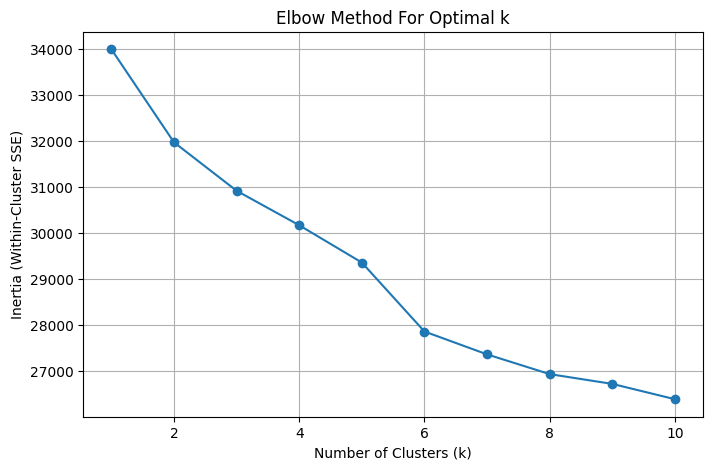

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

##Step 5: Train K-Means Model with k = 4 and Assign Clusters

This step includes:

1. Fitting the KMeans model on your scaled data

2. Assigning a cluster label to each user

3. Appending the Cluster column to your DataFrame

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
df_encoded['Cluster'] = kmeans.labels_


In [ ]:
print("User distribution by cluster:")
print(df_encoded['Cluster'].value_counts())

User distribution by cluster:
Cluster
1    346
2    338
3    168
0    148
Name: count, dtype: int64


In [ ]:
df_encoded[['Age', 'Cluster']].head()


,Age,Cluster
0,29.5,2
1,70.0,0
2,49.5,2
3,39.5,2
4,29.5,2


## Step 6: Profile Each Segment

We'll:

1. Group users by cluster

2. Compute averages and category distributions

3. Interpret the characteristics of each user segment

In [ ]:
cluster_profile = df_encoded.groupby('Cluster').mean(numeric_only=True)

In [ ]:
cluster_profile.T


Cluster,0,1,2,3
Age,40.172297,40.606936,40.008876,39.901786
Likes and Reactions,5122.993243,5033.710983,5204.278107,4393.875000
Followed Accounts,252.236486,247.095376,257.186391,248.113095
Time Spent Online (hrs/weekday),2.663514,2.808671,2.765680,2.718452
Time Spent Online (hrs/weekend),4.372973,4.622543,4.716568,4.528571
Click-Through Rates (CTR),0.121993,0.128616,0.124822,0.122542
Conversion Rates,0.050669,0.049743,0.050388,0.048000
Ad Interaction Time (sec),91.250000,90.835260,90.423077,94.809524
Gender_Female,0.527027,0.000000,1.000000,0.535714
Gender_Male,0.472973,1.000000,0.000000,0.464286


In [ ]:
df_encoded['Cluster']


,Cluster
0,2
1,0
2,2
3,2
4,2
...,...
995,2
996,2
997,1
998,1


In [ ]:
df_encoded[df_encoded['Cluster'] == 0].head(10)

,Age,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Gender_Female,Gender_Male,...,Location_Rural,Location_Suburban,Location_Urban,Language_English,Language_Hindi,Language_Mandarin,Language_Spanish,Time Ratio,Engagement Score,Cluster
1,70.0,9501,375,0.5,7.7,0.114,0.044,68,False,True,...,False,False,True,False,True,False,False,15.399692,0.341088,0
10,21.0,3196,425,1.6,4.3,0.170,0.095,73,True,False,...,False,True,False,True,False,False,False,2.687483,1.178950,0
27,39.5,3224,350,4.5,7.1,0.030,0.005,61,False,True,...,False,True,False,True,False,False,False,1.577774,0.009150,0
30,49.5,9181,228,4.0,3.1,0.115,0.060,151,False,True,...,False,False,True,False,False,True,False,0.774998,1.041900,0
38,49.5,8326,198,1.6,1.5,0.171,0.060,71,True,False,...,False,False,True,True,False,False,False,0.937494,0.728460,0
41,39.5,3465,113,1.7,1.7,0.133,0.059,150,True,False,...,False,True,False,True,False,False,False,0.999994,1.177050,0
42,21.0,688,345,2.8,1.8,0.025,0.001,157,True,False,...,False,False,True,False,False,False,True,0.642855,0.003925,0
46,29.5,4186,418,2.1,7.8,0.092,0.058,90,False,True,...,False,True,False,False,False,True,False,3.714268,0.480240,0
47,39.5,8631,309,2.3,4.1,0.031,0.020,125,False,True,...,False,False,True,True,False,False,False,1.782601,0.077500,0
61,29.5,9929,321,1.2,2.0,0.106,0.030,89,False,True,...,True,False,False,False,True,False,False,1.666653,0.283020,0


In [ ]:
df_encoded[df_encoded['Cluster'] == 1].head(10)

,Age,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Gender_Female,Gender_Male,...,Location_Rural,Location_Suburban,Location_Urban,Language_English,Language_Hindi,Language_Mandarin,Language_Spanish,Time Ratio,Engagement Score,Cluster
7,59.5,3343,272,2.7,1.9,0.128,0.032,35,False,True,...,False,True,False,False,True,False,False,0.703701,0.143360,1
9,49.5,9741,421,2.3,4.4,0.161,0.058,157,False,True,...,True,False,False,False,True,False,False,1.913035,1.466066,1
11,70.0,6746,364,0.6,4.3,0.140,0.049,74,False,True,...,False,True,False,True,False,False,False,7.166547,0.507640,1
12,59.5,9882,264,2.1,2.2,0.156,0.091,9,False,True,...,False,True,False,False,False,False,True,1.047614,0.127764,1
16,29.5,9727,350,1.0,1.8,0.093,0.044,13,False,True,...,True,False,False,False,True,False,False,1.799982,0.053196,1
23,29.5,6659,454,0.9,4.3,0.140,0.093,169,False,True,...,True,False,False,False,False,True,False,4.777725,2.200380,1
28,39.5,8771,246,2.8,1.6,0.190,0.076,96,False,True,...,False,True,False,True,False,False,False,0.571427,1.386240,1
31,29.5,3954,496,4.7,4.4,0.165,0.049,131,False,True,...,False,True,False,False,False,False,True,0.936168,1.059135,1
33,59.5,1024,470,1.9,6.3,0.023,0.062,79,False,True,...,False,False,True,True,False,False,False,3.315772,0.112654,1
35,59.5,5606,132,3.6,7.6,0.154,0.056,14,False,True,...,False,False,True,True,False,False,False,2.111105,0.120736,1


In [ ]:
df_encoded[df_encoded['Cluster'] == 2].head(10)

,Age,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Gender_Female,Gender_Male,...,Location_Rural,Location_Suburban,Location_Urban,Language_English,Language_Hindi,Language_Mandarin,Language_Spanish,Time Ratio,Engagement Score,Cluster
0,29.5,5640,190,4.5,1.7,0.193,0.067,25,True,False,...,False,True,False,False,True,False,False,0.377777,0.323275,2
2,49.5,4775,187,4.5,5.6,0.153,0.095,80,True,False,...,False,True,False,False,False,False,True,1.244442,1.162800,2
3,39.5,9182,152,3.1,4.2,0.093,0.061,65,True,False,...,True,False,False,False,False,False,True,1.354834,0.368745,2
4,29.5,6848,371,2.0,3.8,0.175,0.022,99,True,False,...,False,False,True,True,False,False,False,1.899991,0.381150,2
5,29.5,6203,257,3.8,3.3,0.209,0.048,44,True,False,...,False,True,False,False,True,False,False,0.868419,0.441408,2
6,21.0,1573,136,2.8,7.9,0.172,0.068,8,True,False,...,False,True,False,False,True,False,False,2.821418,0.093568,2
8,49.5,2281,49,1.0,3.2,0.115,0.008,159,True,False,...,False,False,True,False,False,False,True,3.199968,0.146280,2
13,29.5,5982,152,0.9,2.0,0.024,0.084,119,True,False,...,False,True,False,False,False,True,False,2.222198,0.239904,2
14,29.5,6082,249,1.7,2.8,0.238,0.015,95,True,False,...,False,True,False,False,False,False,True,1.647049,0.339150,2
15,29.5,5898,237,0.9,7.4,0.198,0.071,12,True,False,...,True,False,False,False,False,True,False,8.222131,0.168696,2


In [ ]:
df_encoded[df_encoded['Cluster'] == 3].head(10)

,Age,Likes and Reactions,Followed Accounts,Time Spent Online (hrs/weekday),Time Spent Online (hrs/weekend),Click-Through Rates (CTR),Conversion Rates,Ad Interaction Time (sec),Gender_Female,Gender_Male,...,Location_Rural,Location_Suburban,Location_Urban,Language_English,Language_Hindi,Language_Mandarin,Language_Spanish,Time Ratio,Engagement Score,Cluster
21,21.0,9245,117,1.1,2.8,0.172,0.091,119,True,False,...,True,False,False,False,True,False,False,2.545431,1.862588,3
25,49.5,2874,160,3.2,6.1,0.101,0.094,43,True,False,...,True,False,False,False,False,True,False,1.906244,0.408242,3
39,39.5,5615,264,4.7,7.0,0.199,0.075,66,True,False,...,False,True,False,True,False,False,False,1.489359,0.985050,3
43,59.5,3238,168,3.0,1.7,0.218,0.003,111,True,False,...,True,False,False,False,False,False,True,0.566665,0.072594,3
44,29.5,9195,318,0.6,1.1,0.127,0.070,152,True,False,...,True,False,False,True,False,False,False,1.833303,1.351280,3
52,59.5,5552,362,4.8,4.8,0.005,0.094,100,True,False,...,False,True,False,False,False,False,True,0.999998,0.047000,3
53,59.5,3667,229,0.8,5.0,0.130,0.096,14,True,False,...,False,False,True,False,True,False,False,6.249922,0.174720,3
56,21.0,7600,334,2.7,1.5,0.176,0.077,155,True,False,...,False,False,True,True,False,False,False,0.555553,2.100560,3
62,59.5,4421,108,2.1,5.9,0.104,0.062,57,False,True,...,False,True,False,False,True,False,False,2.809510,0.367536,3
66,21.0,9743,235,1.5,6.5,0.108,0.003,61,True,False,...,False,True,False,False,False,True,False,4.333304,0.019764,3


## Cluster Summary and Interpretation (k = 4)

### 🔹 Cluster 0: Budget-Conscious, Moderate Engagement
- **Average Age**: ~40.2  
- **Gender**: ~53% Female  
- **Income Level**: 100% in `0–20k` bracket  
- **Device Usage**: Mixed (Desktop, Mobile, Tablet)  
- **Engagement Score**: Low (~0.556)  
- **Language**: Higher English usage  
- **Location**: Spread across rural, suburban, urban  
- **Education**: Mostly High School and Technical  

**Business Insight**:  
Target with budget-friendly ads, freemium plans, and discount-based promotions.

---

### 🔹 Cluster 1: High-Income, Male-Dominated Users
- **Average Age**: ~40.6  
- **Gender**: 100% Male  
- **Income Level**: Mostly in `60k–100k+` brackets  
- **Device Usage**: Well distributed across all types  
- **Engagement Score**: Highest (~0.600)  
- **Language**: More Spanish and Mandarin  
- **Education**: Strong in Bachelor's and Master's  

**Business Insight**:  
Ideal segment for premium products, tech gadgets, high-end subscriptions.

---

### 🔹 Cluster 2: Young, Female, Highly Active Users
- **Average Age**: ~40.0  
- **Gender**: 100% Female  
- **Likes & Reactions**: Highest among all clusters  
- **Income Level**: Mostly `40k–80k`  
- **Device Usage**: High mobile-only usage  
- **Engagement Score**: Strong (~0.585)  

**Business Insight**:  
Target with fashion, fitness, and lifestyle content. Use mobile-first design and influencer partnerships.

---

### 🔹 Cluster 3: Affluent Urban Professionals
- **Average Age**: ~39.9  
- **Gender**: ~54% Female  
- **Income Level**: 100% in `80k–100k` bracket  
- **Device Usage**: Slightly higher desktop & tablet  
- **Engagement Score**: Moderate (~0.530)  
- **Location**: 38% Rural, remainder urban/suburban  
- **Education**: Mixed, but balanced  

**Business Insight**:  
Target with luxury and curated product bundles. Consider personalized marketing strategies.

## Step 7: Visualize Clusters Using PCA and t-SNE

## 1. PCA

1. We'll use Principal Component Analysis (PCA) to reduce the feature space to 2D and visualize the clusters.

This helps:

   1. See how well clusters are separated

   2. Understand if K-Means formed meaningful groups

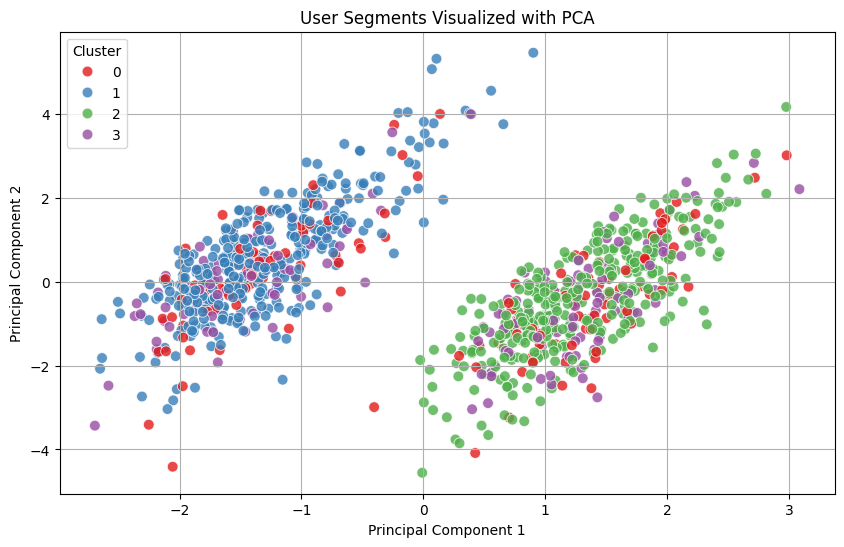

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Apply PCA to reduce features to 2 components
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to DataFrame
df_encoded['PCA1'] = X_pca[:, 0]
df_encoded['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=60, alpha=0.8)
plt.title('User Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


## 2. t-SNE (t-Distributed Stochastic Neighbor Embedding)


1. Captures non-linear patterns.

2. Preserves local similarities (i.e., points from the same cluster stay together).

3. Excellent for cluster visualization.



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


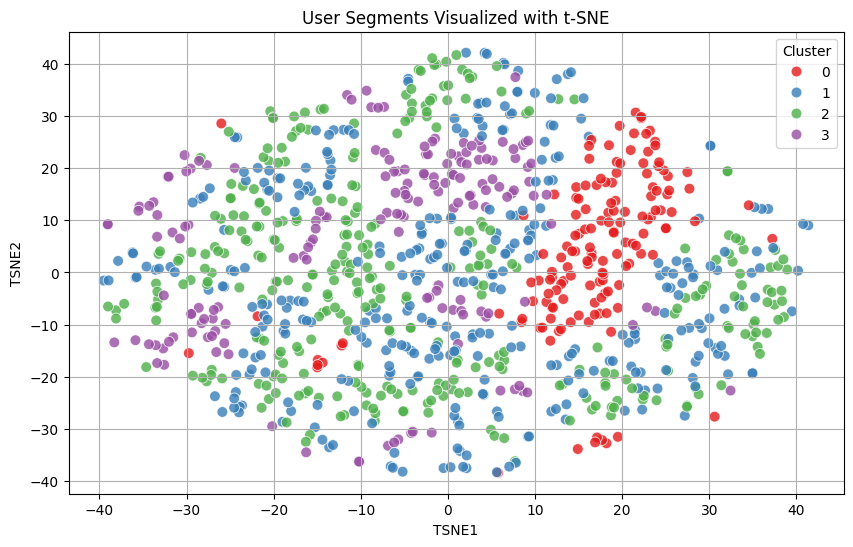

In [ ]:
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Add to DataFrame
df_encoded['TSNE1'] = X_tsne[:, 0]
df_encoded['TSNE2'] = X_tsne[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set1', s=60, alpha=0.8)
plt.title('User Segments Visualized with t-SNE')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


## 3. UMAP (Uniform Manifold Approximation and Projection)

1. Faster than t-SNE on large data

2. Preserves both local and global structure

3. Great for interactive dashboards

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


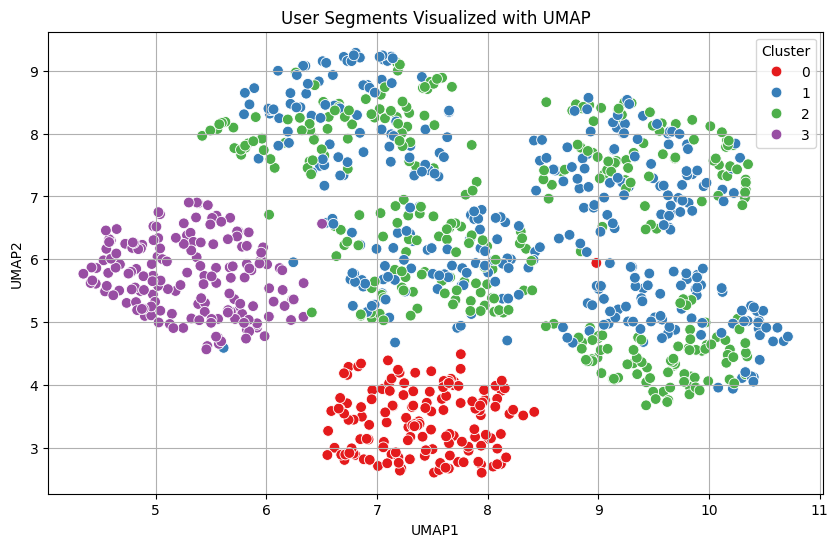

In [ ]:
!pip install umap-learn

import umap

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

df_encoded['UMAP1'] = X_umap[:, 0]
df_encoded['UMAP2'] = X_umap[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='UMAP1', y='UMAP2', hue='Cluster', palette='Set1', s=60)
plt.title('User Segments Visualized with UMAP')
plt.grid(True)
plt.show()


## Step 8: Business Strategy Based on Clusters

We’ll take insights from the cluster profile table you computed earlier (means of age, CTR, devices, income, etc.) and translate them into actionable strategies.


### 🔹 Cluster 0 – Budget-Conscious Utility Users
- **Traits**: Low income (0–20k), moderate engagement, prefer desktop/tablet usage.
- **Strategy**:
  - Promote value-for-money or essential products.
  - Use educational or informative ads.
  - Focus on desktop/tablet ad optimization.
- **Ad Type**: Text-based promotions, savings tips, informative content.

---

### 🔹 Cluster 1 – High-Intent Knowledge Workers
- **Traits**: High income (100k+), highly educated, predominantly desktop users.
- **Strategy**:
  - Promote premium or subscription-based products.
  - Emphasize productivity, performance, and professional benefits.
- **Ad Type**: Clean and professional designs, tech-oriented messaging.

---

### 🔹 Cluster 2 – Mobile-Savvy Social Users
- **Traits**: High social engagement (likes/reactions), mostly mobile-only users, relatively younger.
- **Strategy**:
  - Use engaging, visual content.
  - Leverage influencer campaigns, short videos, and mobile-first formats.
- **Ad Type**: Reels, stories, trend-driven creatives.

---

### 🔹 Cluster 3 – Balanced Urban Users
- **Traits**: Even device split, moderate-to-high engagement, concentrated in urban locations, middle-income.
- **Strategy**:
  - Promote convenience-focused products/services.
  - Run time-based offers for weekend activity.
  - Use mixed-format ads across platforms.
- **Ad Type**: Carousels, app install ads, service promotions.

---

### Final Note:
This segmentation enables:
- Smarter targeting.
- Efficient ad spend.
- Increased relevance and engagement across user types.

The model helps align marketing strategies with user behaviors and preferences.

---


In [ ]:
df_encoded.to_csv("user_segments_with_clusters.csv", index=False)


#Final Project Summary: User Profiling & Segmentation

## Step 1: Define Objective
- Clearly defined the goal: to segment users for targeted ads, improved engagement, and conversion optimization.

## Step 2: Data Collection
- Loaded `'user_profiles_for_ads.csv'` with 1,000 user records.
- Included 16 diverse features:
  - Demographics
  - Engagement metrics
  - Behavioral data
  - User interests

## Step 3: Data Cleaning & Feature Engineering
- Encoded categorical variables (Gender, Device Usage, Education, etc.).
- Dropped non-essential columns where appropriate.
- Created new features:
  - **Time Ratio** = Weekend Time / Weekday Time
  - **Engagement Score** = CTR × Conversion Rate × Ad Interaction Time

## Step 4: Determine Optimal Clusters
- Used the **Elbow Method** to identify the ideal number of clusters.
- Determined that **k = 4** was the most appropriate.

## Step 5: Train Clustering Model
- Scaled data using `StandardScaler`.
- Trained a **K-Means** clustering model.
- Assigned each user to one of the 4 clusters.

## Step 6: Profile Each Segment
- Calculated cluster-wise mean statistics.
- Analyzed behavior patterns:
  - Device usage
  - Engagement levels
  - Income groups
  - Education levels

## Step 7: Visualize Clusters
Used three different dimensionality reduction techniques for validating cluster separability:
- **PCA**: Linear projection to 2D space for basic interpretability.
- **t-SNE**: Non-linear method preserving local structure — revealed tight local groupings.
- **UMAP**: Preserved both local and global structure — displayed well-separated, interpretable clusters.

Each method supported the validity of the 4-cluster segmentation with distinct group behavior.

## Step 8: Business Strategy
- Designed segment-specific marketing strategies based on cluster traits:
  - Platform-specific campaigns (mobile/desktop)
  - Content types (value-driven, visual, premium)
  - Timing (weekend-focused, high-engagement targeting)

---



---

### Developed by:

**Team Members (Summary):**  
PVB Adithya – vprata2@gitam.in / adithya.vprata@gmail.com  
Jay Varma – jmandapa@gitam.in / jayasimhavarma0401@gmail.com  
Surya Vamsi – suryavamsi.m1@gmail.com  
Ramya K – sriramyakatrapalli@gmail.com  

**Team Members (Detailed):**

- **PVB Adithya**  
   vprata2@gitam.in / adithya.vprata@gmail.com  
   GitHub: [pvba-py](https://github.com/pvba-py)  
   LinkedIn: [pvba](https://www.linkedin.com/in/pvba/)

- **Jay Varma**  
   jmandapa@gitam.in / jayasimhavarma0401@gmail.com  
   GitHub: [Jayvarma04](https://github.com/Jayvarma04)  
   LinkedIn: [jayvarma04](https://www.linkedin.com/in/jayvarma04)

- **Surya Vamsi**  
   suryavamsi.m1@gmail.com  
   GitHub: [surya272004](https://github.com/surya272004)  
   LinkedIn: [surya-vamsi-27o2004](https://www.linkedin.com/in/surya-vamsi-27o2004)

- **Ramya K**  
   sriramyakatrapalli@gmail.com  
   GitHub: [Ramyak005](https://github.com/Ramyak005)  
   LinkedIn: [ramya-katrapalli](https://www.linkedin.com/in/ramya-katrapalli-2b0132304/)
